In [67]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_scalar_energy_spectrum, compute_energy_spectrum, compute_scalar_energy_spectrum_numba # type: ignore

### 1D

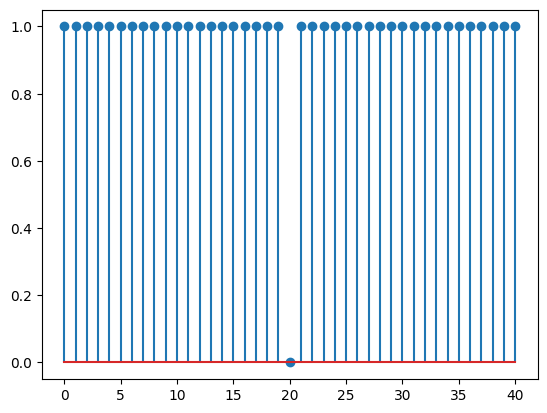

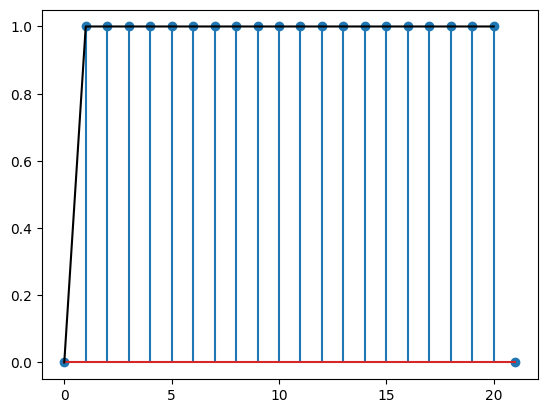

In [68]:
N = 20
ek_u = [1] * N
ek_u = np.array(ek_u[::-1] + [0] + ek_u)
plt.stem(ek_u)

k, ek = compute_scalar_energy_spectrum(
    ek_u=ek_u, debug=False
)
plt.figure()
plt.stem(ek)
plt.plot(ek_u[(len(ek_u)-1)//2:], 'k')

21


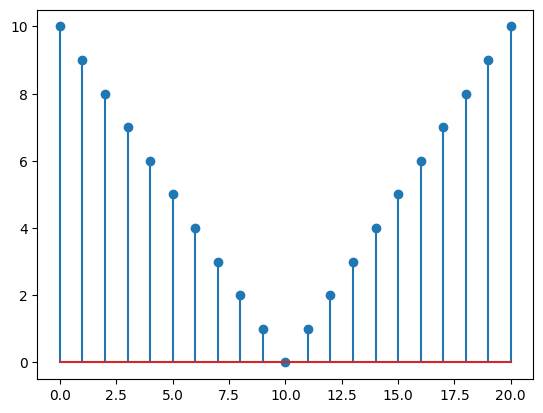

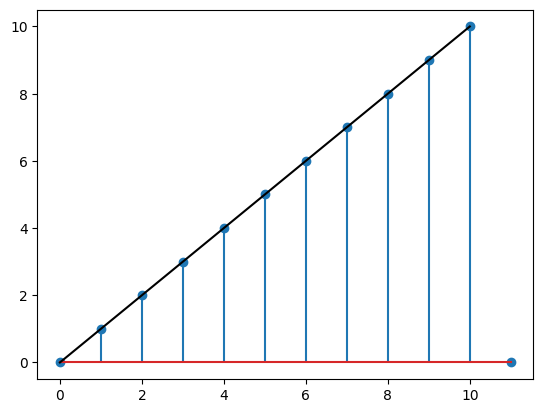

In [69]:
N = 10
ek_u = list(np.arange(N)+1)
ek_u = ek_u[::-1] + [0] + ek_u
ek_u = np.array(ek_u)
print(len(ek_u))
plt.stem(ek_u)

k, ek = compute_scalar_energy_spectrum(ek_u)
plt.figure()
plt.stem(ek)
plt.plot(ek_u[(len(ek_u)-1)//2:], 'k')

### 2D

(-0.5, 29.5, 29.5, -0.5)

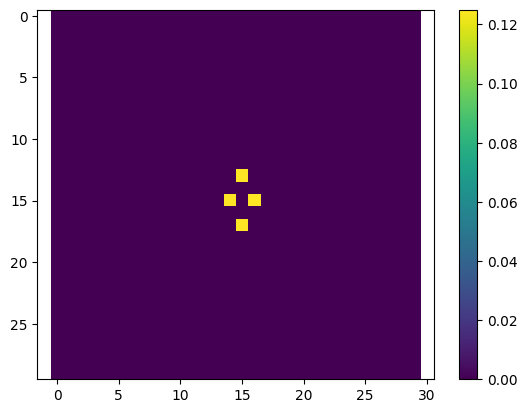

In [70]:
sr = 30
x = y = np.arange(0, 1., 1. / sr)
X, Y = np.meshgrid(x, y)
u = np.sin(2 * np.pi * X) + np.sin(2 * np.pi * 2 * Y)
U0 = 1.

# When
ek_u, ek_v, ek_w, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=None, U0=U0, debug=True
    )
plt.imshow(ek_u)
plt.colorbar()
plt.axis('equal')

In [71]:
tol = 1e-12
ind = np.where(np.abs(u_spectrum - 0.5) < tol)
ind, np.max(u_spectrum)

((array([ 0,  0,  2, 28], dtype=int64), array([ 1, 29,  0,  0], dtype=int64)),
 0.5)

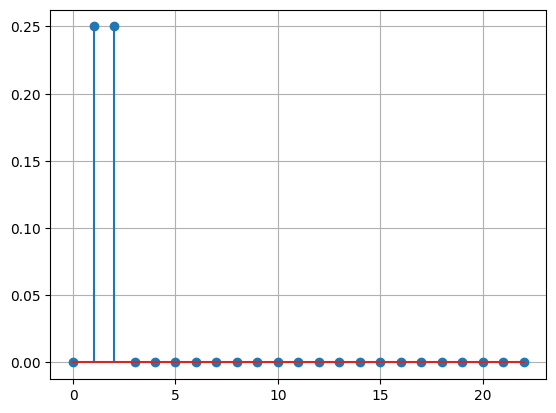

In [72]:
k, ek = compute_scalar_energy_spectrum(ek_u, ek_v)
plt.stem(ek)
plt.grid()

In [73]:
def mirror_data(q1):
    q2 = np.fliplr(q1)
    q3 = np.flipud(q1)
    q4 = np.flipud(q2)
    Q = np.vstack((np.hstack((q1, q2)), np.hstack((q3, q4))))
    return Q

(-0.5, 2.5, 2.5, -0.5)

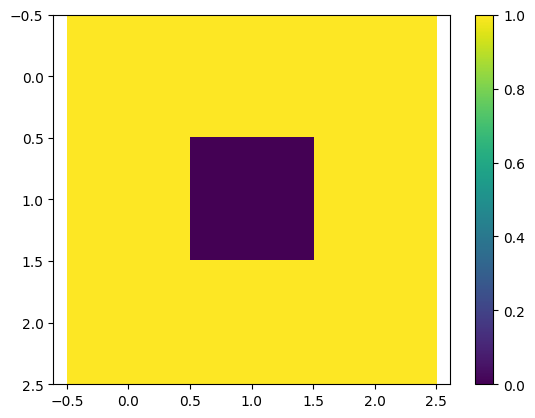

In [74]:
# Create data for first quadrant
ek_u = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
plt.imshow(ek_u)
plt.colorbar()
plt.axis('equal')

In [75]:
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(ek_u, ek_u, debug=True)
print(len(k))

4


<StemContainer object of 3 artists>

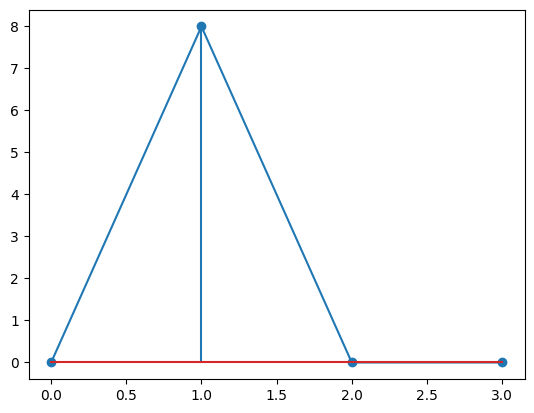

In [76]:
plt.plot(k, ek)
plt.stem(ek_u_sphere)

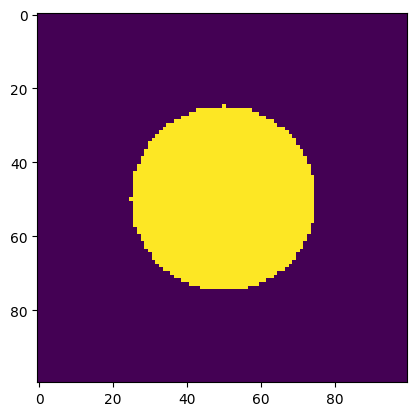

In [77]:
# Create meshgrid of 10X10 points
x = y = np.arange(-1, 1., 1. / 50)
X, Y = np.meshgrid(x, y)

# Create a circle
r = 0.5
u = np.sqrt((X)**2 + (Y )**2) < r
plt.imshow(u)

In [78]:
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(u, u, debug=True)

<StemContainer object of 3 artists>

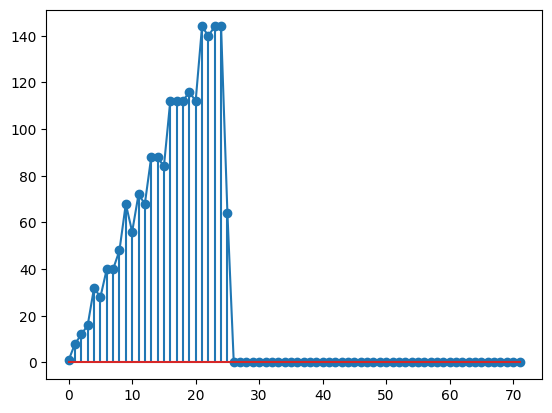

In [79]:
plt.plot(k, ek)
plt.stem(ek_u_sphere)

### 3D

In [80]:
sr = 30
x = y = z = np.arange(0, 1., 1. / sr)
X, Y, Z = np.meshgrid(x, y, z)
u = np.sin(2 * np.pi * X) + np.sin(2 * np.pi * 2 * Y) +\
    np.sin(2 * np.pi * 3 * Z)
U0 = 0.5
ek_u, ek_v, ek_w, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=u, U0=U0, debug=True
    )

In [81]:
tol = 1e-10
ind = np.where(np.abs(u_spectrum - 1.) < tol)
ind, np.max(ek_u)

((array([ 0,  0,  0,  0,  2, 28], dtype=int64),
  array([ 0,  0,  1, 29,  0,  0], dtype=int64),
  array([ 3, 27,  0,  0,  0,  0], dtype=int64)),
 0.5)

In [82]:
ek_u = np.array([
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
])
k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
    compute_scalar_energy_spectrum(ek_u, ek_u, ek_u, debug=True)
print(len(k))

4


array([ 1., 14.,  4.,  0.])

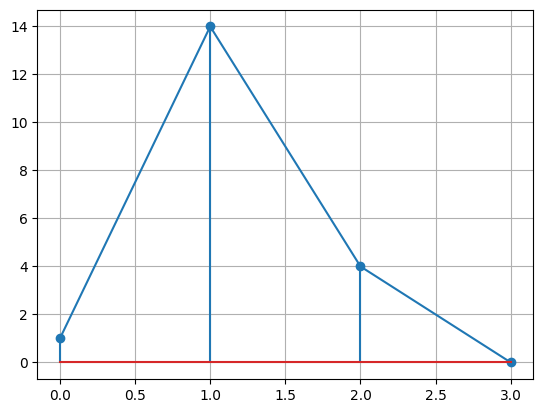

In [83]:
plt.plot(ek_u_sphere)
plt.stem(ek_u_sphere)
plt.grid()
np.round(ek_u_sphere)

### Scipy vs Numpy FFTm

In [84]:
from numpy.fft import fftn as fftn_numpy
from scipy.fft import fftn as fftn_scipy
import numpy as np
import matplotlib.pyplot as plt
import time

In [85]:
# Sampling rate
sr = 5000

# Time vector
t = np.arange(0, 1., 1. / sr)

# Signal
f = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x = np.zeros(len(t))
for i in range(len(f)):
    x += a[i] * np.sin(2 * np.pi * f[i] * t)

# FFT - Numpy
X_numpy = fftn_numpy(x)
X_numpy = np.abs(X_numpy)

# FFT - Scipy
X_scipy = fftn_scipy(x)
X_scipy = np.abs(X_scipy)

(0.653214539946479,
 7652.9221171494255,
 6.817185578769509e-19,
 8.612145751007555e-13)

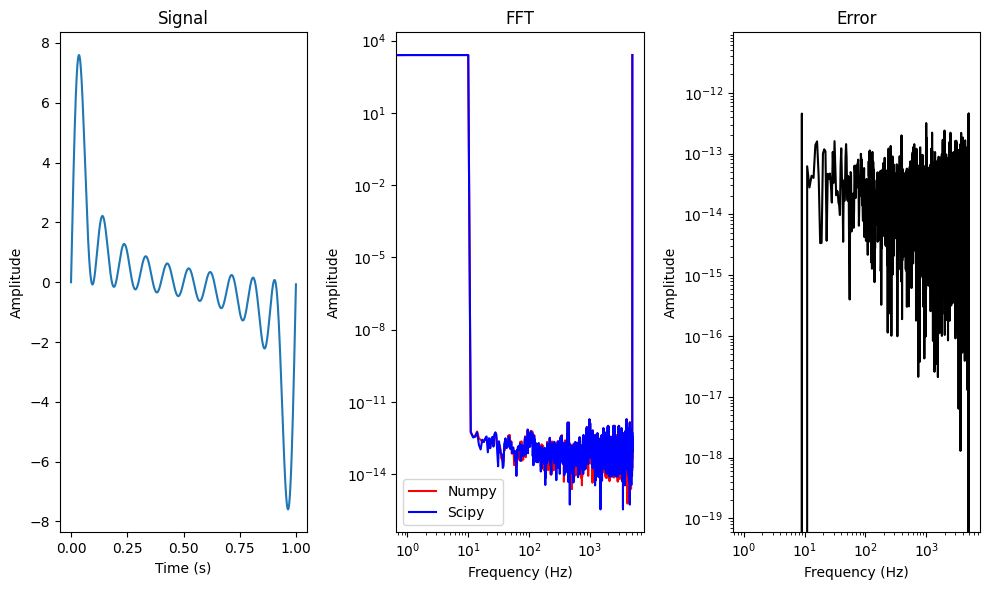

In [86]:
# Plot
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.subplot(132)
plt.loglog(X_numpy, 'r', label='Numpy')
plt.loglog(X_scipy, 'b', label='Scipy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.legend()
plt.subplot(133)
# Plot error
plt.loglog(np.abs(X_numpy - X_scipy), 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Error')

plt.tight_layout()
plt.axis('equal')

In [87]:
# Plot Computation Time of numpy and scipy fftn
N_run = 10
t_numpy = []
t_scipy = []
N_array = np.arange(10, 15) #np.arange(10, 25)
N_array = 2**N_array
for n, N in enumerate(N_array):
    if n % 5 == 0:
        print(n)
    x0 = np.random.rand(N)
    t0 = time.time()
    for i in range(N_run):
        X_numpy = fftn_numpy(x0)
    t1 = time.time()
    t_numpy.append((t1 - t0) / 10)

    t0 = time.time()
    for i in range(N_run):
        X_scipy = fftn_scipy(x0, workers=64)
    t1 = time.time()
    t_scipy.append((t1 - t0) / 10)

0


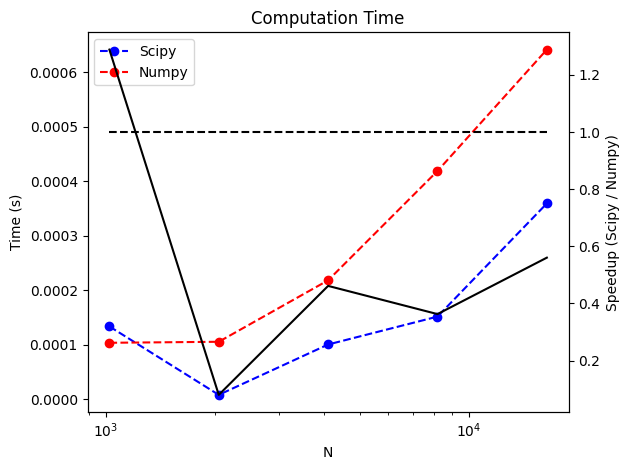

In [88]:
# Plot log-log plots
fig, ax = plt.subplots()
ax.semilogx(N_array, t_scipy, 'bo--', label='Scipy')
ax.semilogx(N_array, t_numpy, 'ro--', label='Numpy')
ax.set_xlabel('N')
ax.set_ylabel('Time (s)')
ax.set_title('Computation Time')
ax.legend()
plt.tight_layout()

# Plot speedup in secondary y-axis
speedup = np.array(t_scipy) / np.array(t_numpy)
speedup = np.abs(speedup)
ax2 = ax.twinx()
ax2.plot(N_array, speedup, 'k')
ax2.set_ylabel('Speedup (Scipy / Numpy)')
ax2.hlines(1, N_array[0], N_array[-1], 'k', '--')
plt.tight_layout()

In [89]:
# %timeit fftn_scipy(x, workers=None)

In [90]:
# %timeit fftn_scipy(x, workers=-1)

In [91]:
# %timeit fftn_scipy(x, workers=1)

In [92]:
# %timeit fftn_scipy(x, workers=64)

### Benchmark Problem

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import compute_energy_spectrum, compute_scalar_energy_spectrum # type: ignore

In [94]:
# Create meshgrid
N = 50
x = y = np.arange(0, 1., 1. / N)
X, Y = np.meshgrid(x, y)

# Sine wave
twopi = 2 * np.pi
u = - np.cos(twopi * X) * np.sin(twopi * Y)
v = np.sin(twopi * X) * np.cos(twopi * Y)

ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

Text(0.5, 1.0, 'v')

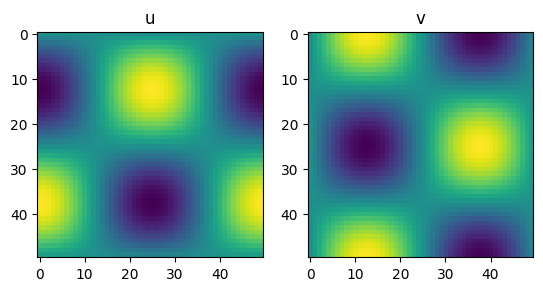

In [95]:
plt.subplot(121)
plt.imshow(u)
plt.title('u')
plt.subplot(122)
plt.imshow(v)
plt.title('v')

Text(0.5, 1.0, 'ek')

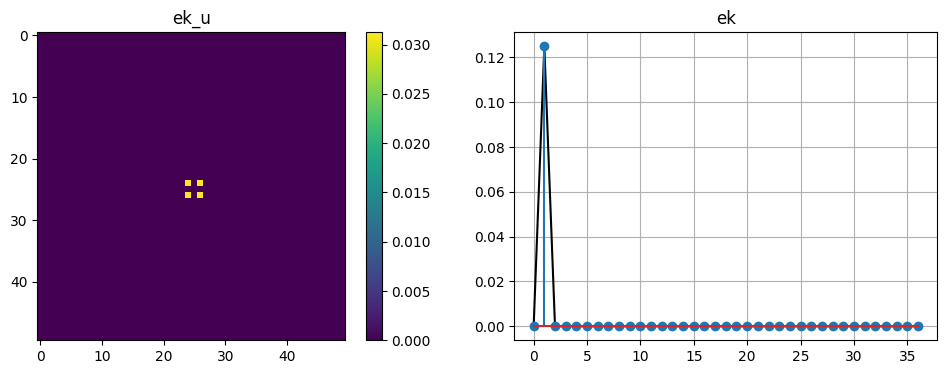

In [96]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(ek_u)
plt.colorbar()
plt.title('ek_u')
plt.subplot(122)
plt.plot(k, ek, 'k')
plt.stem(k, ek)
plt.grid()
plt.title('ek')

In [97]:
def test(perturb=False):
    if not perturb:
        data = np.load('outputs\\tgv_re_100_nx_50_uniform\\energy_spectrum.npz')
    else:
        data = np.load('outputs\\tgv_re_100_nx_50\\energy_spectrum.npz')

    # Kernel radius
    h = data['h']
    k_h = 1. / h

    # Create meshgrid
    N = data["Ni"]
    x = y = np.arange(0, 1., 1. / N)
    X, Y = np.meshgrid(x, y)

    # Initial Sine wave
    twopi = 2 * np.pi
    u = - np.cos(twopi * X) * np.sin(twopi * Y)
    v = np.sin(twopi * X) * np.cos(twopi * Y)
    ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
    k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.loglog(k, ek, 'k-', label='expected')
    plt.loglog(data['k0'], data['ek0'], 'b-', label='TGV0')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

    # Final Sine wave
    b = -2.*twopi/100.
    fac = np.exp(b*data["tf"])
    u = - np.cos(twopi * X) * np.sin(twopi * Y) * fac
    v = np.sin(twopi * X) * np.cos(twopi * Y) * fac
    ek_u, ek_v, ek_w = compute_energy_spectrum(u, v, debug=False)
    k, ek, = compute_scalar_energy_spectrum(ek_u, ek_v, ek_w=None, debug=False)

    plt.subplot(122)
    plt.loglog(k, ek, 'k-', label='expected')
    plt.loglog(data['kf'], data['ekf'], 'b-', label='TGVf')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

In [98]:
# test(perturb=True)

### Test OOP Implementation

In [99]:
from energy_spectrum import EnergySpectrum # type: ignore
import matplotlib.pyplot as plt
import numpy as np

<Figure size 640x480 with 0 Axes>

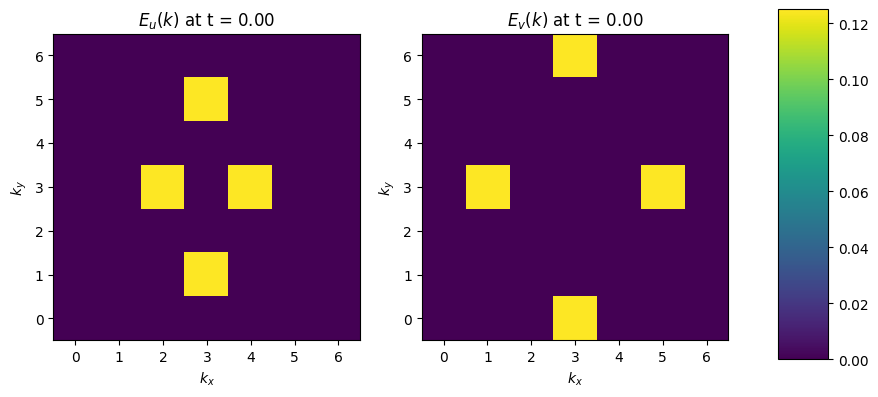

In [102]:
# eval_u = "sin(twopi*x) + sin(twopi*x)"
eval_u = "sin(twopi*x) + sin(2*twopi*y)"
eval_v = "sin(2*twopi*x) + cos(3*twopi*y)"
cf = [eval_u, eval_v]
# cf = None
dim = 2
nx = 7
es = EnergySpectrum.from_example(dim=dim, nx=nx, custom_formula=cf)
# es.plot_scalar_ek(show=1, plot_type="stem")
es.plot_vector_ek(show=1, shift_fft=0)

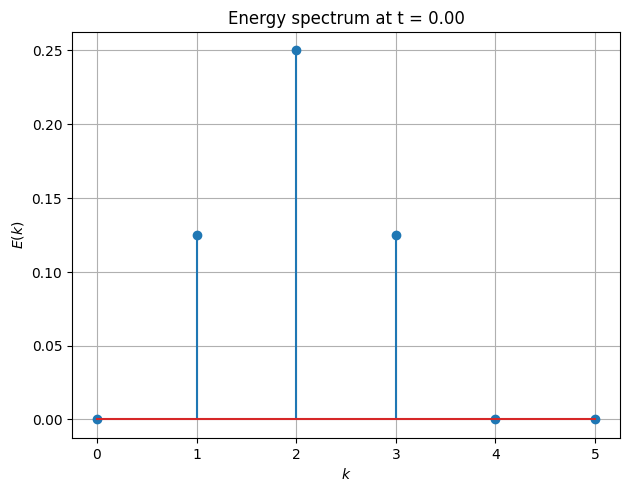

In [103]:
es.plot_scalar_ek(show=1, plot_type="stem")
# es.plot_EK(show=1, shift_fft=0)


In [105]:
# fname = "sin_velocity_profile_output/sin_velocity_profile_00000.hdf5"
# esfile = EnergySpectrum.from_pysph_file(fname=fname, dim=2, L=1, nx_i=50)

In [106]:
# esfile.plot_scalar_ek(show=1, plot_type="stem")

## Numba/Compyle Implementation Speedup Comparison

In [46]:
import timeit
from energy_spectrum import EnergySpectrum # type: ignore
import matplotlib.pyplot as plt
import numpy as np

### 1D

In [26]:
es_ob = EnergySpectrum.from_example(dim=1, nx=50, custom_formula=None)

In [27]:
%timeit es_ob.compute(func_config='python')

3.84 ms ± 684 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit es_ob.compute(func_config='numba')

318 µs ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Speedup

dim = 1
time_python = [4.93566700e-04 2.23530002e-03 7.31023335e-03 8.36484000e-02
 3.83075600e-01 2.56214460e+00 2.56634642e+01]
time_numba = [1.71899990e-04 2.53200027e-04 2.58033319e-04 1.04096668e-03
 6.21999998e-03 6.72219000e-02 2.16294400e-01]
dim = 2
time_python = [5.01033346e-04 1.16813334e-03 7.36279999e-03 5.37899333e-02
 3.92326100e-01 2.67852030e+00 1.99721565e+01]
time_numba = [2.08466663e-04 2.39800002e-04 3.00800001e-04 7.93200025e-04
 8.85830005e-03 5.85731000e-02 7.17368100e-01]
dim = 3
time_python = [1.68916668e-03 2.56366667e-03 1.21582000e-02 8.57480333e-02
 5.73358000e-01 4.00897880e+00 2.19329026e+01]
time_numba = [0.00065327 0.00075063 0.00054983 0.00212537 0.009487   0.0731436
 0.4102149 ]


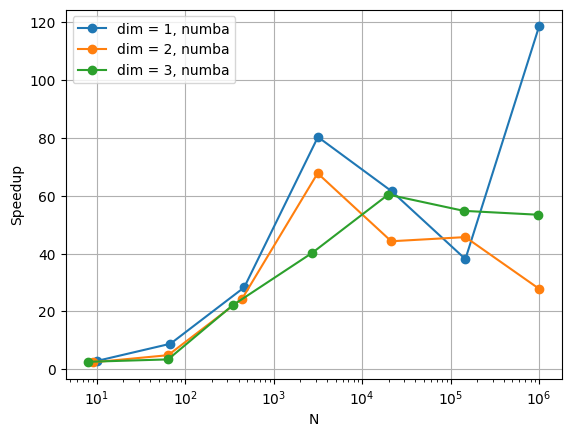

In [64]:
def plot_speedup():
    plt.figure()
    EPS = 1e-50
    for dim in [1, 2, 3]:
        print(f"dim = {dim}")
        time_python, time_numba = [], []
        N_list = np.logspace(1, 6, 7)
        nx_list = np.power(N_list, 1./dim).astype(int)
        for idx, nx in enumerate(nx_list):
            if N_list[idx] > 1e4:
                N_iter = 1
            else:
                N_iter = 3
            es_ob = EnergySpectrum.from_example(
                dim=dim, nx=nx, custom_formula=None
            )
            time_python.append(
                timeit.timeit(
                    lambda: es_ob.compute(func_config='python'), number=N_iter
                ) / N_iter
            )
            time_numba.append(
                timeit.timeit(
                    lambda: es_ob.compute(func_config='numba'), number=N_iter
                ) / N_iter
            )
            
            # Print % completion
            print(f"{idx+1}/{len(nx_list)} | nx = {nx} ", end='\r')
        
        time_python = np.array(time_python) + EPS
        time_numba = np.array(time_numba) + EPS
        print(f"time_python = {time_python}")
        print(f"time_numba = {time_numba}")
        speedup_numba = time_python / time_numba
        plt.semilogx(
            nx_list**dim, speedup_numba, label=f'dim = {dim}, numba',
            marker='o'
        )
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('Speedup');
    plt.grid()

# plot_speedup()

## Compyle Implementation

In [ ]:
from compyle.api import Elementwise, annotate, wrap, get_config, declare
import numpy as np
from numba import njit
from math import sin
import matplotlib.pyplot as plt

from energy_spectrum import compute_energy_spectrum, compute_scalar_energy_spectrum

In [ ]:
sr = 30
x = y = z = np.arange(0, 1., 1. / sr)
X, Y, Z = np.meshgrid(x, y, z)
u = np.sin(2 * np.pi * X) + np.sin(2 * np.pi * 2 * Y) +\
    np.sin(2 * np.pi * 3 * Z)
U0 = 0.5
ek_u, ek_v, ek_w, u_spectrum, v_spectrum, w_spectrum =\
    compute_energy_spectrum(
        u=u, v=u, w=u, U0=U0, debug=True
    )

In [ ]:
k, ek, = compute_scalar_energy_spectrum(ek_u=ek_u, ek_v=ek_v, ek_w=ek_w, debug=False)
plt.stem(k, ek)

In [ ]:
@njit
def numba_ek(ek_u, shape_ek_u, ek_v, ek_w, ord=2):
    # Check shape of velocity components for given dimensions
    eps = 1e-50

    box_side_x = shape_ek_u[0]
    box_side_y = shape_ek_u[1]
    box_side_z = shape_ek_u[2]

    # box_side_x = np.shape(ek_u)[0]
    # box_side_y = np.shape(ek_u)[1] if dim > 1 else 0
    # box_side_z = np.shape(ek_u)[2] if dim > 2 else 0

    tmp = np.array([box_side_x, box_side_y, box_side_z], dtype=np.float64)
    box_radius = 1 + np.ceil(np.linalg.norm(tmp, ord=2) / 2)
    box_radius = int(box_radius)

    center_x = int(box_side_x / 2)
    center_y = int(box_side_y / 2)
    center_z = int(box_side_z / 2)

    ek_u_sphere = np.zeros((box_radius, )) + eps
    ek_v_sphere = np.zeros((box_radius, )) + eps
    ek_w_sphere = np.zeros((box_radius, )) + eps

    for i in range(box_side_x):
        for j in range(box_side_y):
            for k in range(box_side_z):
                tmp = np.array([i - center_x, j - center_y, k - center_z], dtype=np.float64)
                wn = np.round(np.linalg.norm(tmp, ord=ord))
                wn = int(wn)

                one_d_idx = int(i*box_side_y*box_side_z + j*box_side_z + k)

                ek_u_sphere[wn] += ek_u[one_d_idx]
                ek_v_sphere[wn] += ek_v[one_d_idx]
                ek_w_sphere[wn] += ek_w[one_d_idx]

    ek = 0.5 * (ek_u_sphere + ek_v_sphere + ek_w_sphere)
    k = np.arange(0, len(ek))

    return k, ek, ek_u_sphere, ek_v_sphere, ek_w_sphere

In [ ]:
def get_valid_input(ek_u, ek_v, ek_w):
    dim = len(np.shape(ek_u))
    if dim == 1:
        shape_ek_u = tuple(list(ek_u.shape) + [0, 0])
        ek_u = ek_u.ravel()
        ek_v = np.zeros_like(ek_u)
        ek_w = np.zeros_like(ek_u)
    elif dim == 2:
        shape_ek_u = tuple(list(ek_u.shape) + [0])
        ek_u = ek_u.ravel()
        ek_v = ek_v.ravel()
        ek_w = np.zeros_like(ek_u)
        
    elif dim == 3:
        shape_ek_u = tuple(list(ek_u.shape))
        ek_u = ek_u.ravel()
        ek_v = ek_v.ravel()
        ek_w = ek_w.ravel()        
    return ek_u, ek_v, ek_w, shape_ek_u

ek_u_prime, ek_v_prime, ek_w_prime, shape_ek_u = get_valid_input(ek_u, ek_v, ek_w)
shape_ek_u, np.shape(ek_u_prime), np.shape(ek_v_prime), np.shape(ek_w_prime)


In [ ]:
@annotate(i='int', doublep='ek_u, ek_v, ek_w, ek_u_sphere, ek_v_sphere, ek_w_sphere', int='box_side_y, box_side_z , center_x, center_y, center_z')
def compyle_ek(i, ek_u, ek_v, ek_w, ek_u_sphere, ek_v_sphere, ek_w_sphere, box_side_y, box_side_z, center_x, center_y, center_z):
    j = declare('int')
    k = declare('int')
    wn = declare('int')
    for j in range(box_side_y):
        for k in range(box_side_z):
            wn = 
            wn = i-center_x #max(abs(i-center_x), abs(j-center_y), abs(k-center_z))
            # Get 1D index from 3D index
            idx = i*box_side_y*box_side_z + j*box_side_z + k
            ek_u_sphere[wn] += ek_u[i][j][k]
            ek_v_sphere[wn] += ek_v[i][j][k]
            ek_w_sphere[wn] += ek_w[i][j][k]
            


def fast_ek_calculator(ek_u, ek_v, ek_w):
    from numpy.linalg import norm as norm
    eps = 1e-50

    dim = len(np.shape(ek_u))

    box_side_x = np.shape(ek_u)[0]
    box_side_y = np.shape(ek_u)[1] if dim > 1 else 0
    box_side_z = np.shape(ek_u)[2] if dim > 2 else 0

    box_radius = int(
        1 + np.ceil(
            norm(np.array([box_side_x, box_side_y, box_side_z])) / 2
        )
    )

    center_x = int(box_side_x / 2)
    center_y = int(box_side_y / 2)
    center_z = int(box_side_z / 2)

    ek_u_sphere = np.zeros((box_radius, )) + eps
    ek_v_sphere = np.zeros((box_radius, )) + eps
    ek_w_sphere = np.zeros((box_radius, )) + eps

    backend = 'cython'
    get_config().use_openmp = True
    ek_u, ek_v, ek_w, ek_u_sphere, ek_v_sphere, ek_w_sphere =\
        wrap(ek_u.ravel(), ek_v.ravel(), ek_w.ravel(), ek_u_sphere.ravel(), ek_v_sphere.ravel(), ek_w_sphere.ravel(), backend=backend)
    
    e = Elementwise(compyle_ek, backend=backend)
    e(ek_u, ek_v, ek_w, ek_u_sphere, ek_v_sphere, ek_w_sphere, box_side_x, box_side_y, box_side_z, center_x, center_y, center_z)

    ek_u_sphere.pull(); ek_v_sphere.pull(); ek_w_sphere.pull()
    ek_u_sphere = ek_u_sphere.data
    ek_v_sphere = ek_v_sphere.data
    ek_w_sphere = ek_w_sphere.data


    ek = 0.5 * (ek_u_sphere + ek_v_sphere + ek_w_sphere)
    k = np.arange(0, len(ek))
    return k, ek

In [ ]:
fk, fek = fast_ek_calculator(ek_u, ek_v, ek_w)

In [ ]:
plt.stem(fk, fek)

In [ ]:
# Get 3d array of arange(1, 9)
n = 30
a = np.arange(0, n**3).reshape(n, n, n)

# Get random 3d array
a = np.random.rand(n+1, n, n+2)
# a

In [ ]:
a_flat = a.ravel()
a_flat

In [ ]:
nx, ny, nz = np.shape(a)
print(f"nx = {nx}, ny = {ny}, nz = {nz}")
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            # Convert 3d index to 1d index
            onedidx = i*ny*nz + j*nz + k
            # print(f"3d index: {i}, {j}, {k} -> 3d value: {a[i][j][k]}")
            # print(f"1d index: {onedidx} -> 1d value: {a_flat[onedidx]}")
            if a[i][j][k] != a_flat[onedidx]:
                raise ValueError("Something went wrong")

In [ ]:
@annotate(i='int', doublep='x, y', int='ny, cy')
def compyle_1d_test(i, x, y, ny, cy):
    j = declare('int')
    wn = declare('int')
    for j in range(ny):
        wn = max(abs(i-cy))
        idx = int(i*ny + j)
        y[wn] += x[idx]

def run_1d_test(x):
    eps = 1e-50

    dim = len(np.shape(x))

    nx = np.shape(x)[0]
    ny = np.shape(x)[1] if dim > 1 else 0

    cy = int(nx / 2)

    y = np.zeros((nx, )) + eps

    backend = 'cython'
    get_config().use_openmp = True
    x, y = wrap(x.ravel(), y.ravel(), backend=backend)
    
    e = Elementwise(compyle_1d_test, backend=backend)
    e(x, y, nx, ny, cy)

    y.pull()
    y = y.data

    return y

In [ ]:
x = [
    [0, 1, 0],
    [1, 0, 1],
    [1, 1, 1]
]
x = np.array(x)
res = run_1d_test(x)